# Marketing Analytics

by Harshit Sharma and Sai Vineeth Kaza 

## Introduction
The aim of the project is to Analyse the Marketing Dataset and propose data driven solutions in order to improve marketing campaign results. The solution involves implementing 3 sections namely: 

**Section 01: Exploratory Data Analysis**  
* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

**Section 02: Statistical Analysis**  
* What factors are significantly related to the number of store purchases?
* People who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test. 
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish?
* Is there a significant relationship between geographical regional and success of a campaign?

**Section 03: Data Visualization**  
* Which products are performing best?
* Which channels are underperforming?

## Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv('marketing_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


* Clean up column names
* Transform selected columns to numeric format:
    - `Income` to float

In [4]:
# clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

# transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


# Section 01: Exploratory Data Analysis

### Are there any null values or outliers? How will you wrangle/handle them?

In [6]:
# null values
df.isnull().sum().sort_values(ascending=False)

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

* The feature `Income` contains 24 null values
* To decide the imputation function, we need to know the distribution of Income feature

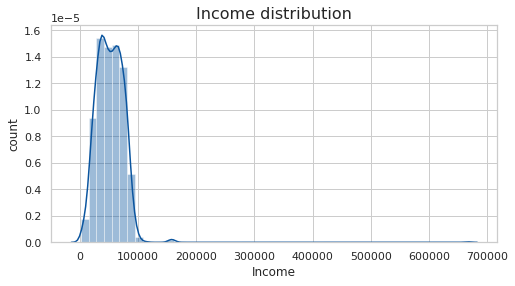

In [7]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

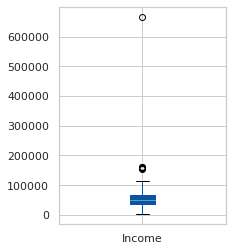

In [8]:
df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

* Impute null values in `Income`, using median value

In [9]:
df['Income'] = df['Income'].fillna(df['Income'].median())

#### Outliers

* Identify features containing outliers:
    - Multiple features contain outliers
    - Only that likely indicate data entry errors are `Year_Birth <= 1900`

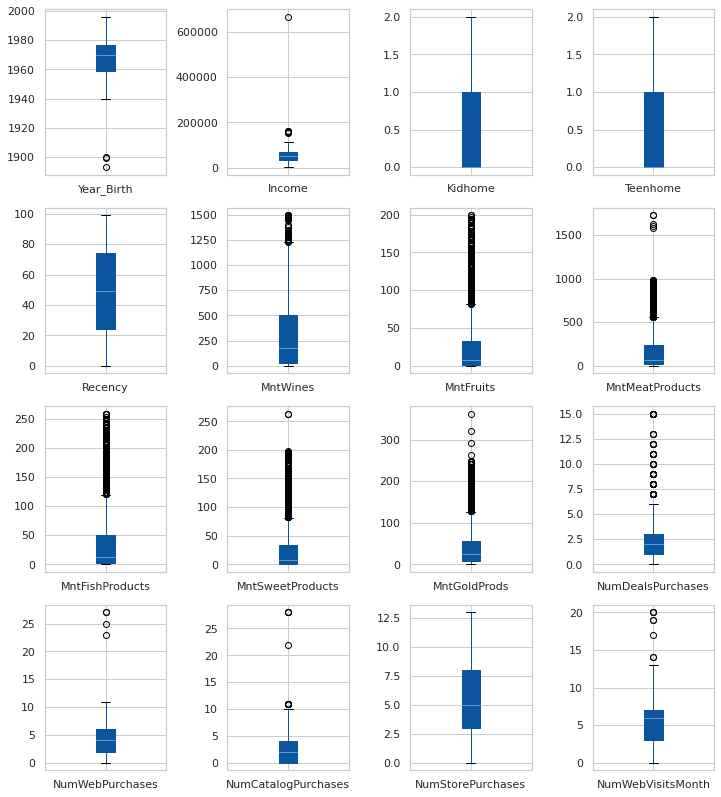

In [10]:
# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

* Remove rows where `Year_Birth <= 1900`:

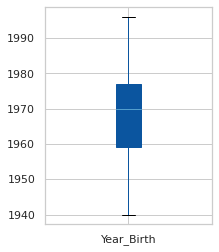

In [11]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind='box', patch_artist=True);

## Are there any variables that warrant transformations?
`Dt_Customer` column should be transformed to datetime format

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

* Transform `Dt_Customer` to datetime:

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### Are there any useful variables that you can engineer with the given data?
* Following columns can be engineered
    - The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'
    - The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'
    - The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'
    - The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'

In [14]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

* Perform feature engingeering as outlined in notes above:

In [15]:
# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Year becoming a Customer
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

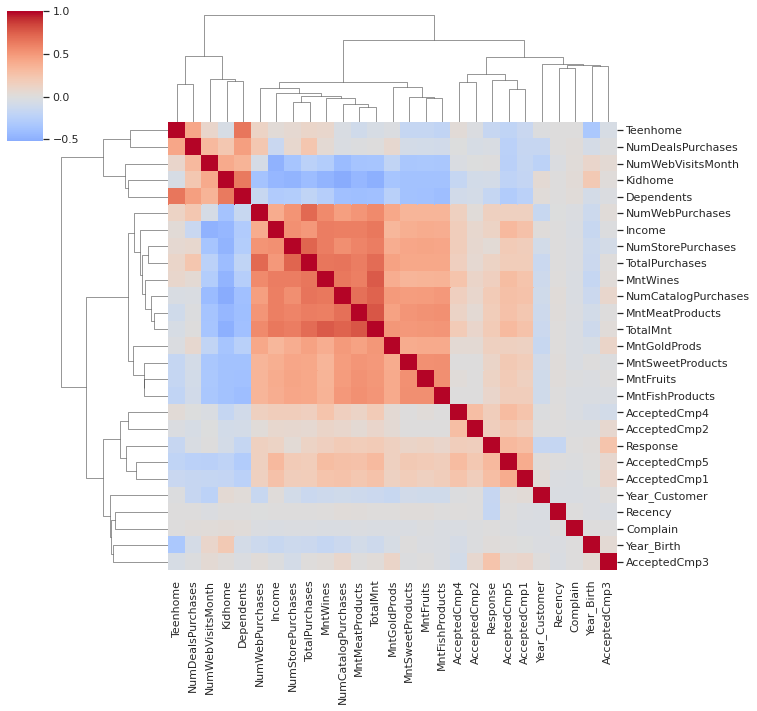

In [16]:
# calculate correlation matrix
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

- Finding correlated features

In [17]:
# Finding the mutually correlated features
correlated_features = set()
for i in range(len(corrs.columns)):
    for j in range(i):
        if abs(corrs.iloc[i, j]) > 0.6:
            colname = corrs.columns[i]
            correlated_features.add(colname)

In [18]:
correlated_features

{'Dependents',
 'MntMeatProducts',
 'MntWines',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'TotalMnt',
 'TotalPurchases'}

In [19]:
correlated_features.remove('NumStorePurchases')
correlated_features.remove('TotalPurchases')

Plot illustrating the effect of high income on spending:

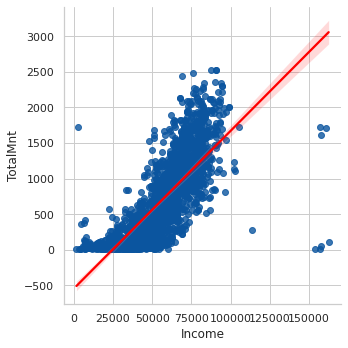

In [20]:
sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income'] < 200000], line_kws={'color': 'red'});

Plot illustrating negative effect of having dependents (kids & teens) on spending:

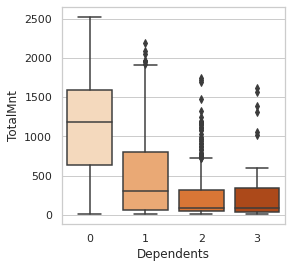

In [21]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=df, palette='Oranges');

Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased:

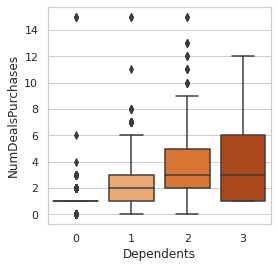

In [22]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df, palette='Oranges');

* Investigate anomaly: 
    - Number of web visits in the last month is not positively correlated with number of web purchases
    - Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website

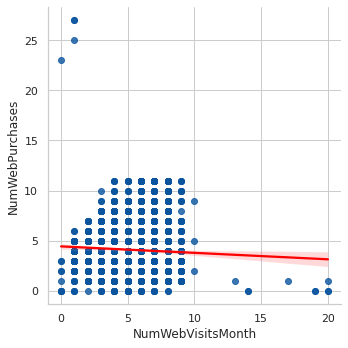

In [23]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df, line_kws={'color': 'red'});

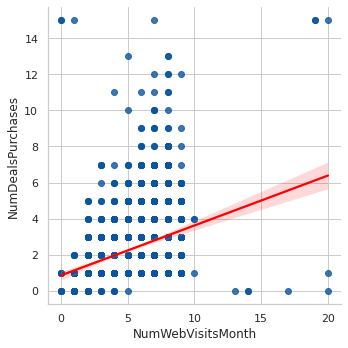

In [24]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df, line_kws={'color': 'red'});

# Section 02: Statistical Analysis
### What factors are significantly related to the number of store purchases?  

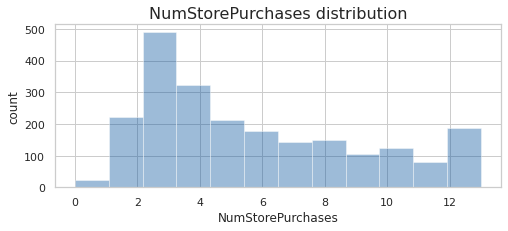

In [25]:
# Investigating the target variable
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count');

In [26]:
# drop unique ID
df_orig = df.copy()
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

# removing correlated features
df.drop(columns=correlated_features, inplace=True)

In [27]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntFruits', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Year_Customer',
       'TotalPurchases'],
      dtype='object')

In [28]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

# get categorical features and review number of unique values
cat = df.select_dtypes(exclude=np.number)

# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

# merge with numeric data
num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.columns=["Education_2n_Cycle"] + list(df2.columns[1:]) 
df2.head()

,Education_2n_Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Year_Customer,TotalPurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,84835.0,0,0,0,104,111,189,218,1,4,6,1,0,0,0,0,0,1,0,2014,15
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1961,57091.0,0,0,0,5,7,0,37,1,7,7,5,0,0,0,0,1,1,0,2014,18
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1958,67267.0,0,1,0,11,15,2,30,1,3,5,2,0,0,0,0,0,0,0,2014,11
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967,32474.0,1,1,0,0,0,0,0,1,1,2,7,0,0,0,0,0,0,0,2014,4
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1989,21474.0,1,0,0,16,11,0,34,2,3,2,7,1,0,0,0,0,1,0,2014,8


* Fit linear regression model to the data

In [29]:
# 1. Linear regression using statsmodels
import statsmodels.formula.api as smf
all_columns = list(df2.columns)
all_columns.remove("NumStorePurchases")
all_columns = '+'.join(['_'.join(x.split()) for x in all_columns])
model = smf.ols(formula=' NumStorePurchases ~ {}'.format(all_columns), data=df2).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      NumStorePurchases   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     246.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:44:42   Log-Likelihood:                -3930.1
No. Observations:                2237   AIC:                             7940.
Df Residuals:                    2197   BIC:                             8169.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -48.1220     68.622     -0.701      0.483    -182.694      86.450
Education_2n_Cycle         -9.5315     13.726     -0.694      0.487     -36.449      17.386
Education_Basic            -9.7446     13.715     -0.711      0.477     -36.640      17.150
Education_Graduation       -9.6244     13.728     -0.701      0.483     -36.545      17.296
Education_Master           -9.5190     13.728     -0.693      0.488     -36.439      17.402
Education_PhD              -9.7024     13.729     -0.707      0.480     -36.625      17.220
Marital_Status_Absurd      -6.9928      8.629     -0.810      0.418     -23.914       9.929
Marital_Status_Alone       -5.6674      8.635     -0.656      0.512     -22.602      11.267
Marital_Status_Divorced    -6.0395      8.582     -0.704      0.482     -22.869      10.790
Marital_Status_Married     -6.0390      8.581     -0.704      0.482     -22.866      10.788
Marital_Status_Single      -5.9981      8.582     -0.699      0.485     -22.828      10.832
Marital_Status_Together    -6.1116      8.579     -0.712      0.476     -22.935      10.712
Marital_Status_Widow       -6.0499      8.580     -0.705      0.481     -22.876      10.776
Marital_Status_YOLO        -5.2236      8.595     -0.608      0.543     -22.079      11.632
Country_AUS                -5.9882      8.579     -0.698      0.485     -22.812      10.835
Country_CA                 -5.9538      8.584     -0.694      0.488     -22.786      10.879
Country_GER                -5.8142      8.579     -0.678      0.498     -22.638      11.010
Country_IND                -6.0644      8.581     -0.707      0.480     -22.892      10.763
Country_ME                 -6.6028      8.596     -0.768      0.443     -23.460      10.255
Country_SA                 -5.8428      8.583     -0.681      0.496     -22.674      10.988
Country_SP                 -5.8307      8.580     -0.680      0.497     -22.656      10.994
Country_US                 -6.0251      8.580     -0.702      0.483     -22.851      10.801
Year_Birth                  0.0065      0.003      2.198      0.028       0.001       0.012
Income                  -6.801e-06   1.74e-06     -3.916      0.000   -1.02e-05    -3.4e-06
Kidhome                     0.1300      0.077      1.698      0.090      -0.020       0.280
Teenhome                    0.3754      0.069      5.469      0.000       0.241       0.510
Recency                    -0.0031      0.001     -2.904      0.004      -0.005      -0.001
MntFruits                   0.0017      0.001      1.599      0.110      -0.000       0.004
MntFishProducts            -0.0017      0.001     -2.145      0.032      -0.003      -0.000
MntSweetProducts           -0.0006      0.001     -0.626      0.532      -0.003       0.001
MntGoldProds               -0.0019      0.001  

In [31]:
[x[0] for x in sorted(list(model.pvalues.items()), key=lambda x:x[1]) if x[1] < 0.05]

['TotalPurchases',
 'NumDealsPurchases',
 'NumWebPurchases',
 'AcceptedCmp3',
 'Response',
 'Teenhome',
 'Income',
 'AcceptedCmp1',
 'NumWebVisitsMonth',
 'Recency',
 'MntGoldProds',
 'Year_Birth',
 'MntFishProducts',
 'AcceptedCmp4']

In [32]:
var_p_values = sorted(list(zip(model.pvalues.index, model.pvalues.values)), key=lambda x:x[1])
var = [x[0] for x in var_p_values]
p_values = [x[1] for x in var_p_values]

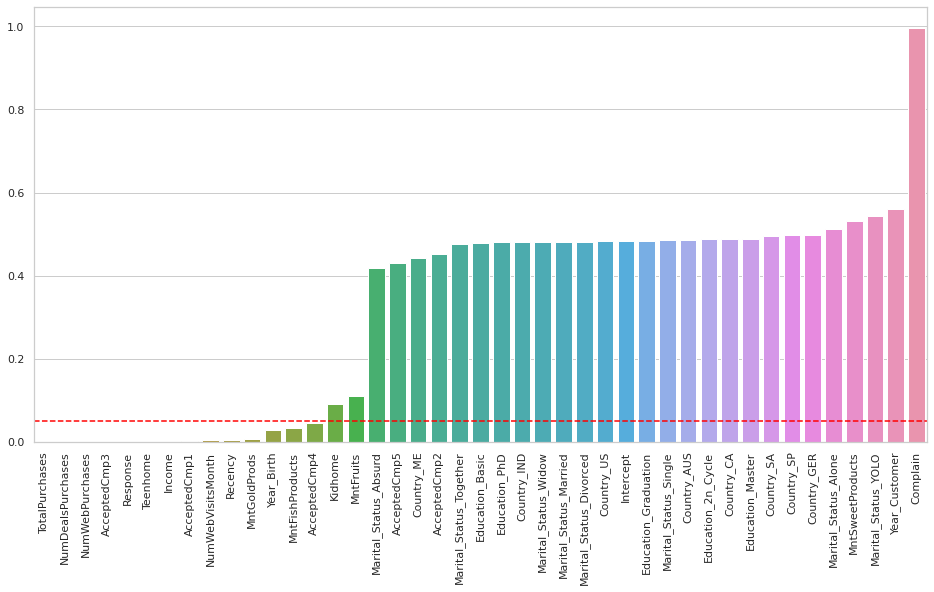

In [33]:
plt.figure(figsize=(16,8))
ax=sns.barplot(var, p_values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.axhline(0.05, ls='--', c='red')

* Fit Poisson regression model to the data

                 Generalized Linear Model Regression Results                  
Dep. Variable:      NumStorePurchases   No. Observations:                 1565
Model:                            GLM   Df Residuals:                     1525
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.7
Date:                Tue, 14 Dec 2021   Deviance:                       635.53
Time:                        03:44:47   Pearson chi2:                     537.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Education_2n_Cycle        

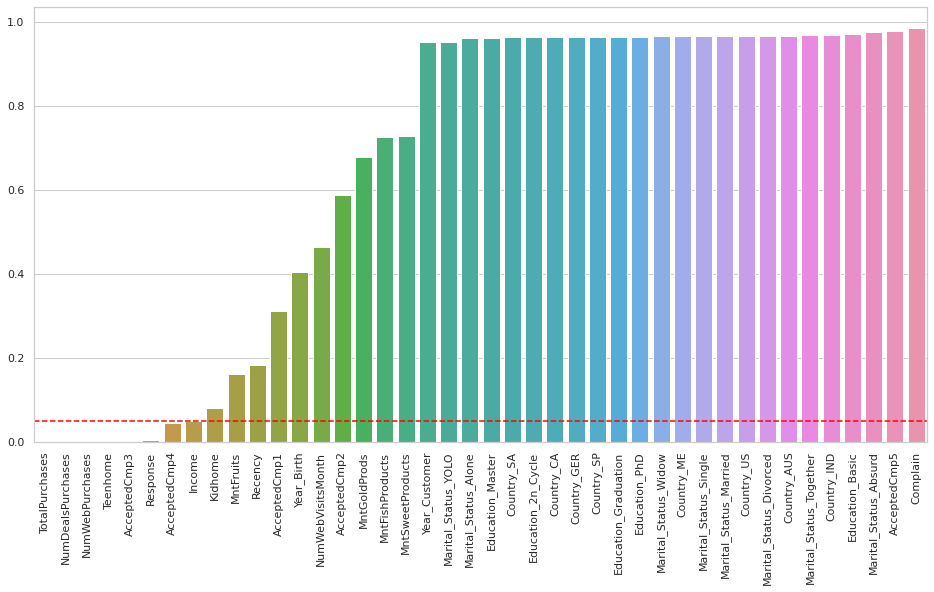

In [34]:
import statsmodels.api as sm
from sklearn.linear_model import PoissonRegressor
from sklearn import metrics# Perform train - test split
from sklearn.model_selection import train_test_split

X_PR = df2.drop(columns='NumStorePurchases')
Y_PR = df2['NumStorePurchases']
X_train_PR, X_test_PR, Y_train_PR, Y_test_PR = train_test_split(X_PR, Y_PR, test_size = 0.3, random_state = 42)# Poisson regression model
poisson_training_results = sm.GLM(Y_train_PR, X_train_PR , family =sm.families.Poisson()).fit()

print(poisson_training_results.summary())
print("-"*100)
poisson_predictions = poisson_training_results.get_prediction(X_test_PR)
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)
print("-"*100)
summary = poisson_training_results.summary()


def results_summary_to_dataframe(results):
    pvals = results.pvalues
    coeff = results.params
    std_err = results.bse 
    results_df = pd.DataFrame({"pvals":pvals,
                                "coeff":coeff,
                                "std_err": std_err})
    results_df = results_df[["coeff","pvals","std_err"]]
    return results_df

results = results_summary_to_dataframe(poisson_training_results)
results_1 = results.reset_index()
results_1.columns = ['variables','coeff','pvals','std_err']
results_pr = results_1[['variables','pvals','std_err']]
results_pr.columns = ['variables','pvals_PR','std_err_PR']
var_p_values = sorted(results_pr.values, key=lambda x:x[1])
var = [x[0] for x in var_p_values]
p_values = [x[1] for x in var_p_values]
plt.figure(figsize=(16,8))

ax=sns.barplot(var, p_values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.axhline(0.05, ls='--', c='red')

### People who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

In [35]:
above_average_df = df[df['MntGoldProds']>df['MntGoldProds'].mean()]
below_average_df = df[df['MntGoldProds']<=df['MntGoldProds'].mean()]

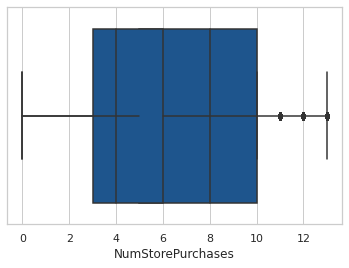

In [36]:
sns.boxplot(above_average_df['NumStorePurchases'], orient="v")
sns.boxplot(below_average_df['NumStorePurchases'], orient="v")

In [37]:
from scipy.stats import ttest_ind
pval = ttest_ind(above_average_df['NumStorePurchases'], below_average_df['NumStorePurchases'])
pval

Ttest_indResult(statistic=21.246193750785554, pvalue=2.1521329239919762e-91)

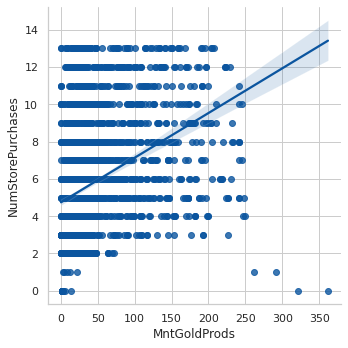

In [38]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data = df);

* Perform Kendall correlation analysis

In [39]:
from scipy.stats import kendalltau, spearmanr, pearsonr

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


Text(0, 0.5, 'Frequency')

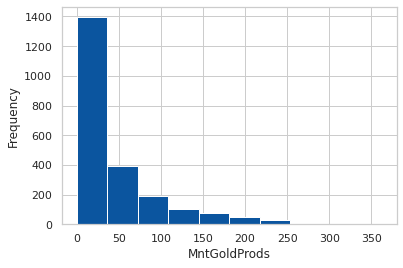

In [40]:
plt.hist(df['MntGoldProds'])
plt.xlabel('MntGoldProds')
plt.ylabel('Frequency')

In [41]:
spearmanr(df['MntGoldProds'], df['NumStorePurchases'])

SpearmanrResult(correlation=0.5403015280046147, pvalue=9.061771078878164e-170)

### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? 

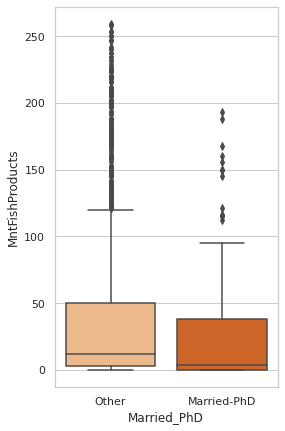

In [42]:
# sum the marital status and phd dummy variables - the Married+PhD group will have value of 2
df2['Married_PhD'] = df2['Marital_Status_Married'] + df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

# plot MntFishProducts between Married-PhD and others
plt.figure(figsize=(4,7))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df2, palette='Oranges');

In [43]:
# independent t-test p-value
from scipy.stats import ttest_ind
pval = ttest_ind(df2[df2['Married_PhD'] == 'Married-PhD']['MntFishProducts'], df2[df2['Married_PhD'] == 'Other']['MntFishProducts'])
print("t-test p-value: ", pval)

t-test p-value:  Ttest_indResult(statistic=-2.7911332066401737, pvalue=0.005297012242158541)


In [44]:
# now drop the married-phD column created above, to include only the original variables in the analysis below
df2.drop(columns='Married_PhD', inplace=True)

### Is there a significant relationship between geographical regional and success of a campaign?
Perform logistic regression for each the campaigns and plot the results

In [45]:
# df['Country_code'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})
# success of campaigns by country code
df_cam = df[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

# rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

* Statistical summary of regional effects on campaign success:
    - Methodology: Performed logistic regression for Campaign Accepted by Country, reporting Chisq p-value for overall model.
    - Findings: The regional differences in advertising campaign success are statistically significant.

In [46]:
df_cam.head(10)

,Country,Campaign,Accepted (%)
0,AUS,1,4.375000
1,AUS,2,0.000000
2,AUS,3,5.625000
3,AUS,4,3.750000
4,AUS,5,8.125000
5,AUS,Most recent,14.375000
6,CA,1,6.716418
7,CA,2,2.238806
8,CA,3,6.716418
9,CA,4,8.955224


In [47]:
# calculate logistic regression p-values for campaign acceptance ~ country using generalized linear model
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

## get the data of interest for glm
df_cam_wide = df[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

## to store statistics results
stat_results = []

## perform glm
for col in df_cam_wide.drop(columns='Country').columns:
    this_data = df_cam_wide[['Country', col]]
    
    # define formula
    formula = col+'~Country'
    
    # logistic regression (family=binomial)
    model = smf.glm(formula = formula, data=this_data, family=sm.genmod.families.Binomial())
    result = model.fit()
    
    # get chisquare value for overall model (CampaignAccepted ~ Country) and calculate p-value
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq , 7) # Df Model = 7 degrees of freedom when you run result.summary()
     
    # append to stat_results
    stat_results.append(pval)
    
    # print stat summary for entire model
    print(result.summary())
    
## check results
print("\nChisq p-values: ", stat_results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AcceptedCmp1   No. Observations:                 2237
Model:                            GLM   Df Residuals:                     2229
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.52
Date:                Tue, 14 Dec 2021   Deviance:                       1065.0
Time:                        03:44:59   Pearson chi2:                 2.23e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0845      0.387     -7.

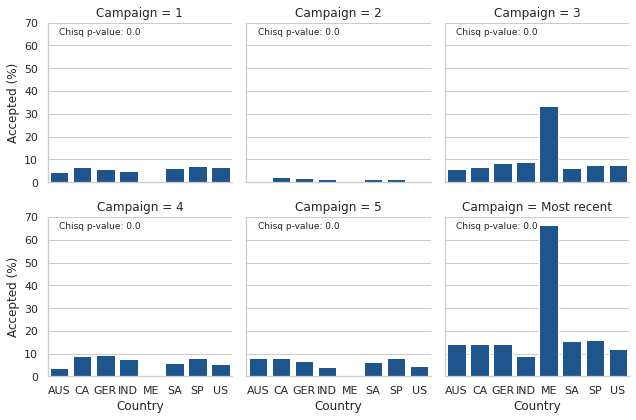

In [48]:
## bar graphs
g = sns.FacetGrid(df_cam, col='Campaign', col_wrap=3)
g.map(sns.barplot, 'Country', 'Accepted (%)')
for ax, pval in zip(g.axes.flat, stat_results):
    ax.text(0, 65, "Chisq p-value: "+str(pval), fontsize=9)

# Section 03: Data Visualization

### Which products are performing best?

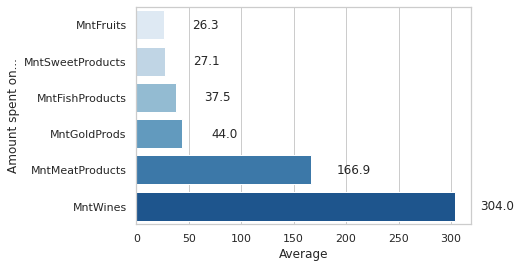

In [49]:
spending = pd.DataFrame(round(df_orig[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

### Which channels are underperforming?

In [50]:
df_orig.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Year_Customer', 'TotalMnt', 'TotalPurchases'],
      dtype='object')

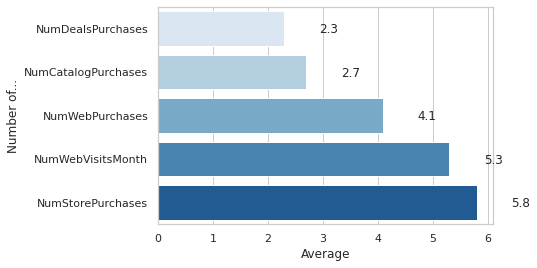

In [51]:
channel_cols = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
channels = pd.DataFrame(round(df_orig[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

# Conclusion

Summary of suggested actions:
* The most successful advertising campaign was the most recent campaign (column name: Response), and was particularly successful in Mexico (>60% acceptance rate!)
Suggested action: Conduct future advertising campaigns using the same model recently implemented in Mexico.

* The most successful products are wines and meats (i.e. the average customer spent the most on these items).
Suggested action: Focus advertising campaigns on boosting sales of the less popular items.


* The underperforming channels are deals and catalog purchases (i.e. the average customer made the fewest purchases via these channels).
The best performing channels are web and store purchases (i.e. the average customer made the most purchases via these channels).
Suggested action: Focus advertising campaigns on the more successful channels, to reach more customers.

* Linear and Poisson regression models considered 'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases', 'NumWebVisitsMonth' and 'Kidhome' features as statistically significant. 
Suggested action: Focus advertising campaigns to increase the sales in the above mentioned channels and to attract the kids.